### seaborn
- https://seaborn.pydata.org/

- palettes 설정
    - https://seaborn.pydata.org/tutorial/color_palettes.html
- 

In [48]:
# 라이브러리 로드

import seaborn as sns
import matplotlib.pyplot as plt

# 한글설정
import koreanize_matplotlib

# default theme 적용
sns.set_theme()

### 통계적 관계의 시각화
- figure-level : relplot
- axes-level : scatterplot, lineplot

In [16]:
# 사용할 데이터 세트 로드
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> 식당에서 지불한 총금액과 팁 정보
> - total_bill: 식당에서 받은 총 계산 금액
> - tip: 팁 금액
> - sex: 계산을 한 사람의 성별 ("Male", "Female")
> - smoker: 흡연 여부 (흡연자인지 아닌지)
> - day: 방문한 요일 (예: "Thur", "Fri", "Sat", "Sun")
> - time: 식사 시간 ("Lunch" 또는 "Dinner")
> - size: 방문한 인원 수 

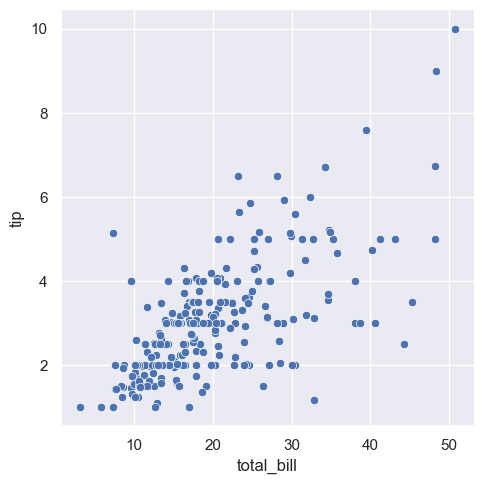

In [63]:
# total_bill과 tip 의 관계
g = sns.relplot(data=tips, x="total_bill", y="tip")

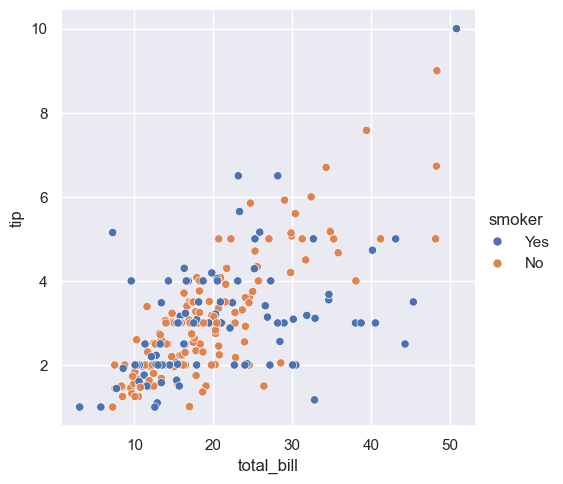

In [61]:
# total_bill과 tip 의 관계 외에 smoker 변수를 추가
g = sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

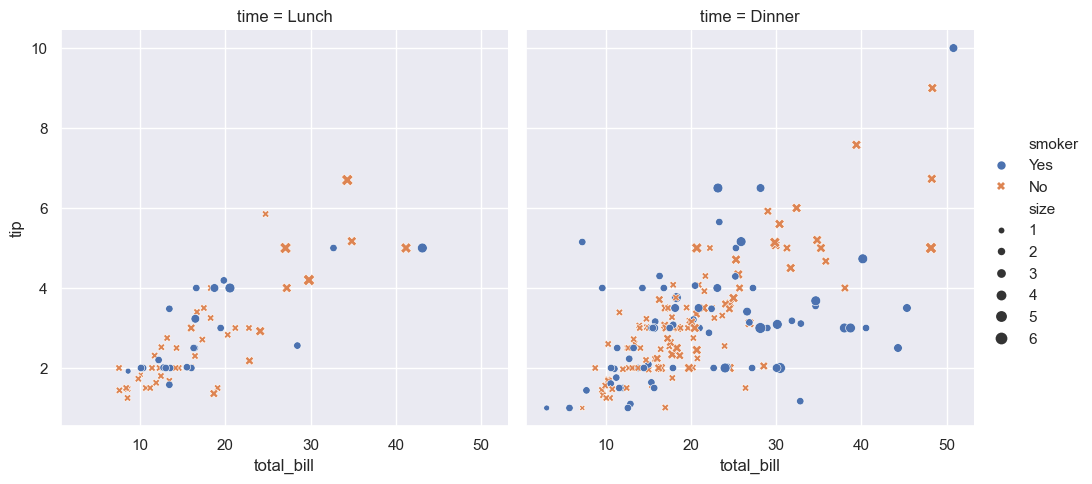

In [64]:
g = sns.relplot(x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size", data=tips)

In [95]:
# 선차트

fmri = sns.load_dataset("fmri")
fmri.head(2)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883


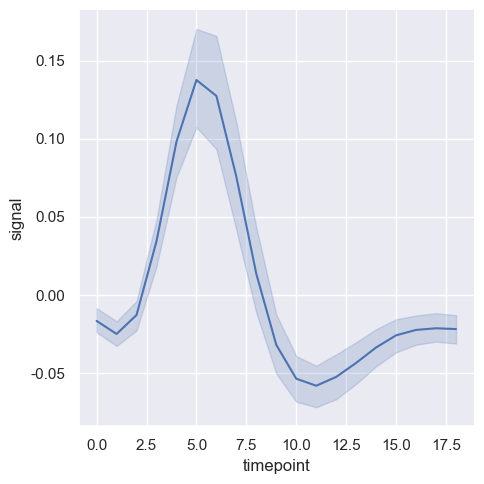

In [72]:
# g = sns.lineplot(x="timepoint",y="signal", data=fmri)

g = sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

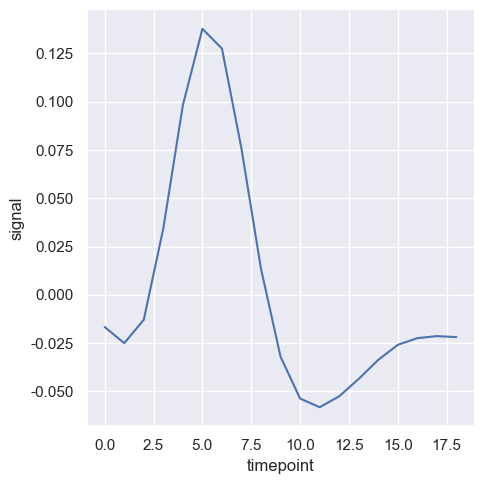

In [75]:
# 오차구간과 신뢰구간을 제거
g = sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", errorbar=None)

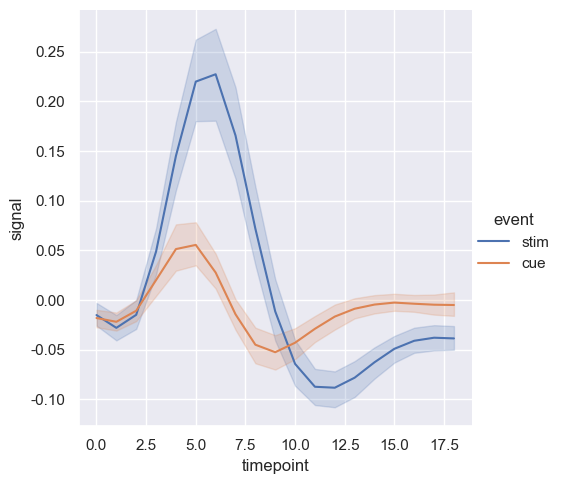

In [79]:
# g = sns.lineplot(x="timepoint",y="signal",hue="event", data=fmri)

g = sns.relplot(data=fmri, x="timepoint", y="signal", hue="event", kind="line")

### 데이터 분포 시각화
- figure-level : displot
- axes-level : histplot, kdeplot, ecdfplot, rugplot

In [87]:
# displot() 은 histplot 이 기본임
penguins = sns.load_dataset("penguins")
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


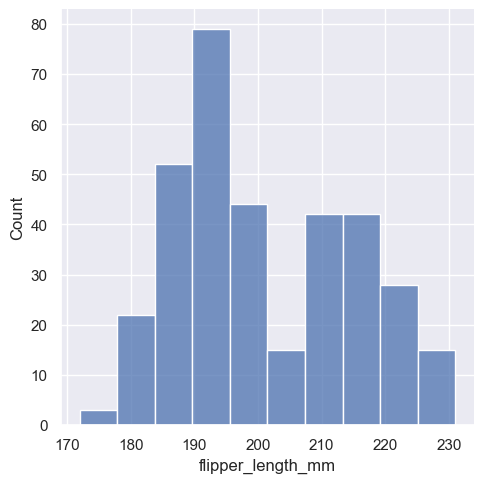

In [88]:
# 펭귄 날개 길이 분포
g = sns.displot(data=penguins, x="flipper_length_mm")

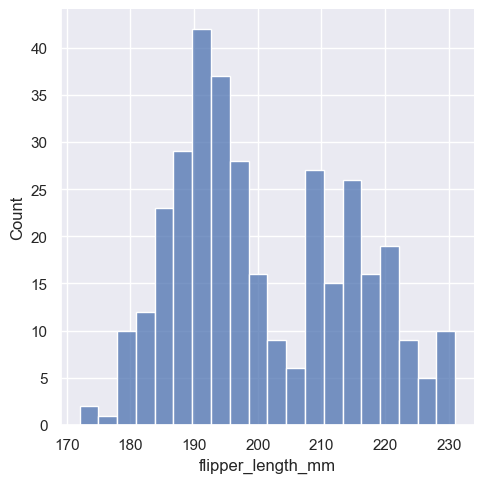

In [ ]:
# bin width 변경
g = sns.displot(penguins, x="flipper_length_mm", binwidth=3)

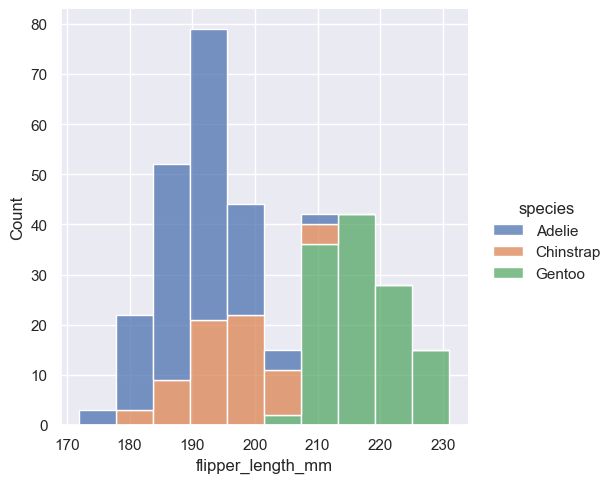

In [89]:
# 펭귄 날개 길이 분포를 종 별로 보기
g = sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

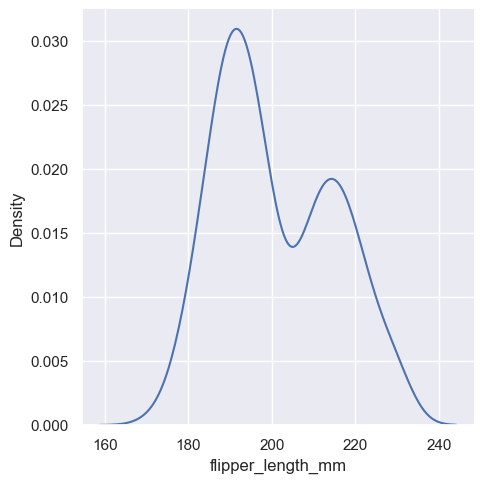

In [91]:
# Kernel density estimation(kde)
g = sns.displot(penguins, x="flipper_length_mm", kind="kde")

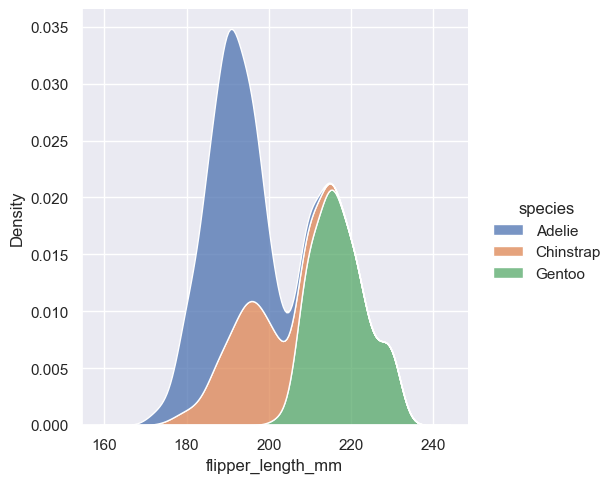

In [93]:
g = sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

### 범주형 데이터 시각화
- figure-level 함수 : catplot
- axes-level 함수 : stripplot, swarmplot, boxplot, violineplot, pointplot, barplot 

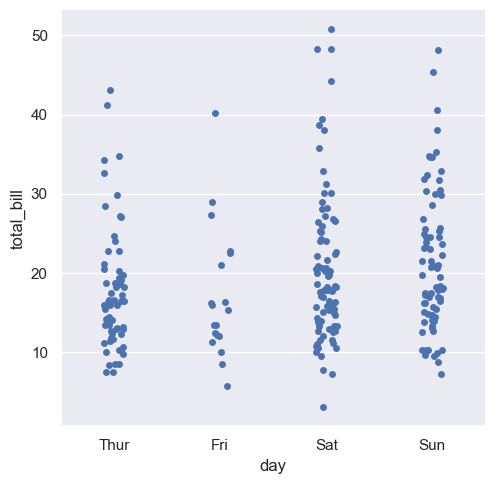

In [32]:
# day별 지불된 total_bill 값을 산점도로 나타내기
tips = sns.load_dataset("tips")
g = sns.catplot(data=tips, x="day", y="total_bill")

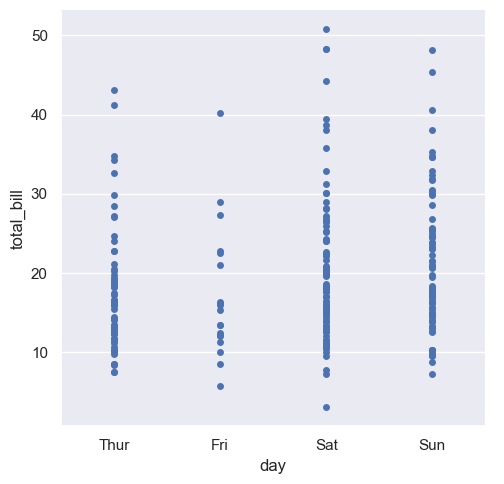

In [33]:
# jitter : 데이터 밀도를 더 잘 시각화 하기 위해 추가되는 무작위 노이즈
# jitter : 지터 없애기
g = sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

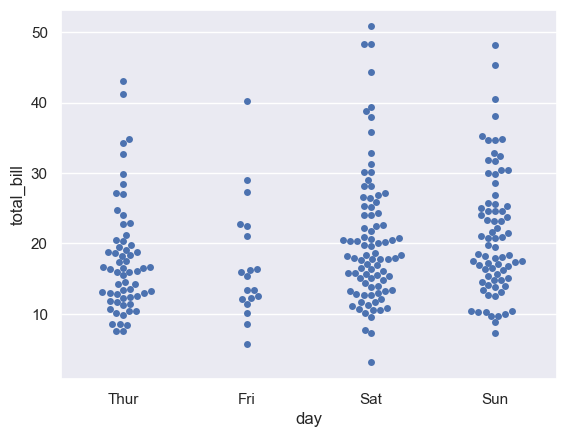

In [96]:
# g = sns.swarmplot(data=tips, x="day", y="total_bill")
g = sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

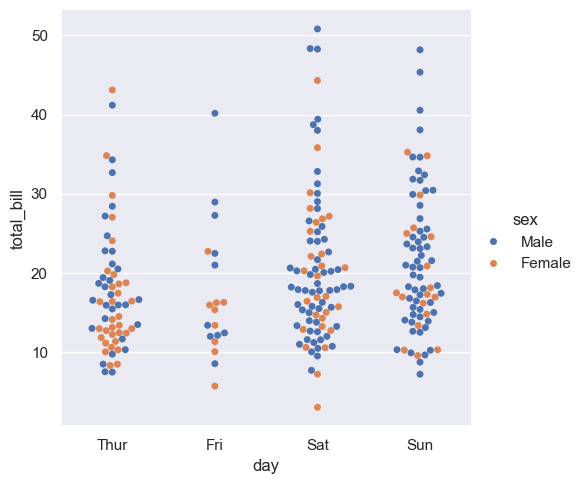

In [37]:
# 성별을 구분하는 hue 변수를 이용해 범주형 그래프에 차원 추가
g = sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

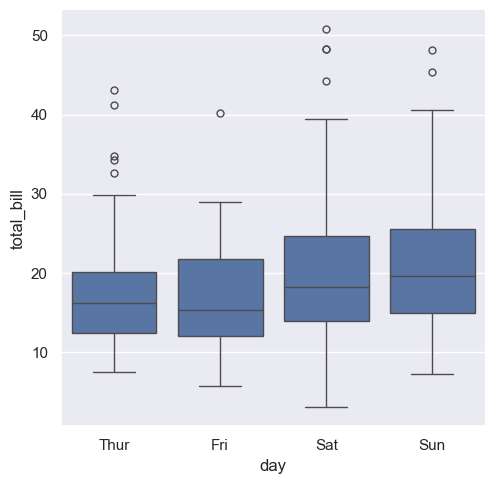

In [97]:
g = sns.catplot(x="day",y="total_bill", kind="box", data=tips)

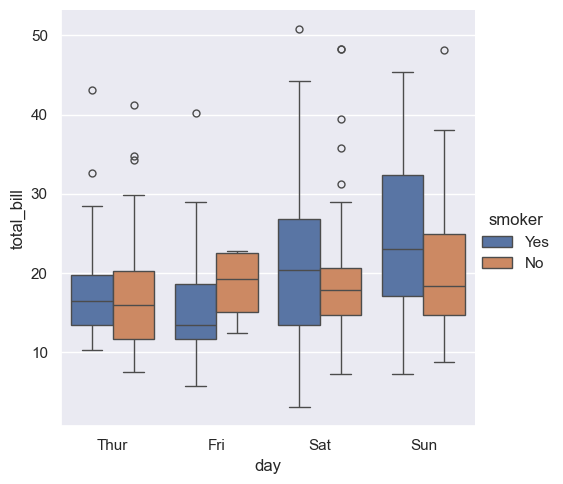

In [ ]:
tips = sns.load_dataset("tips")
g = sns.catplot(x="day",y="total_bill", kind="box",  hue="smoker", data=tips)

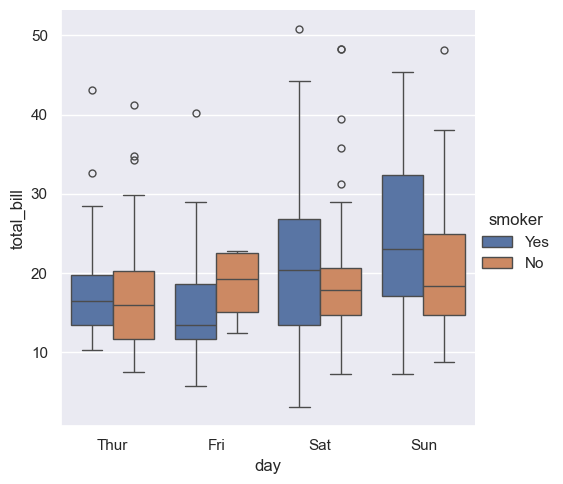

In [ ]:
tips = sns.load_dataset("tips")
g = sns.catplot(x="day",y="total_bill", kind="box",  hue="smoker", data=tips)

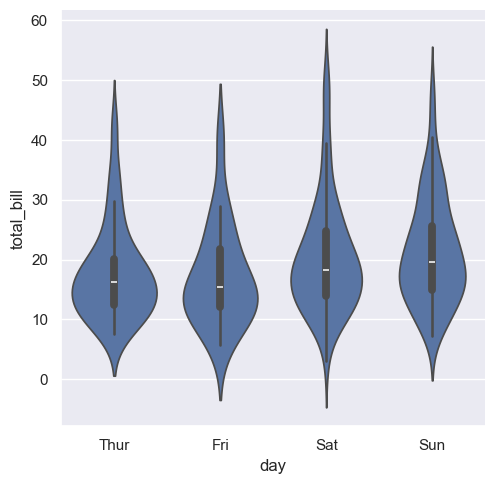

In [99]:
g = sns.catplot(data=tips, y="total_bill", x="day", kind="violin")

### 멀티플롯 그리드 시각화

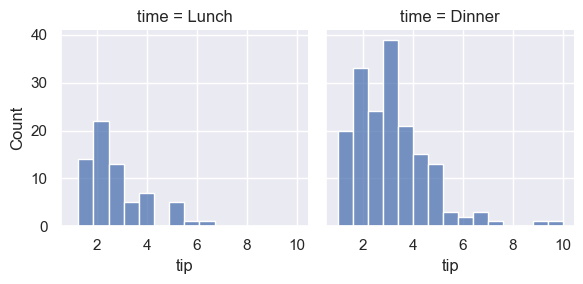

In [110]:
# FacetGrid 클래스 객체 초기화

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

# 사용할 그래프와 x 축에 사용할 레이블명을 지정
g.map(sns.histplot, "tip");


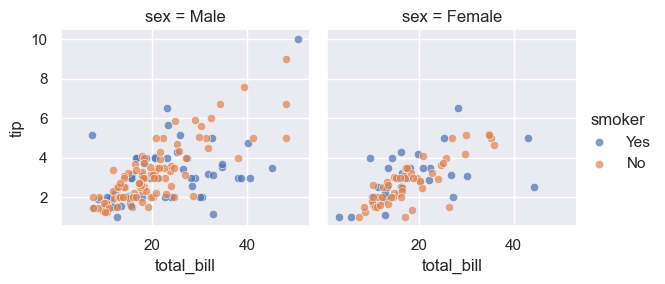

In [103]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
# 범례 추가
g.add_legend();

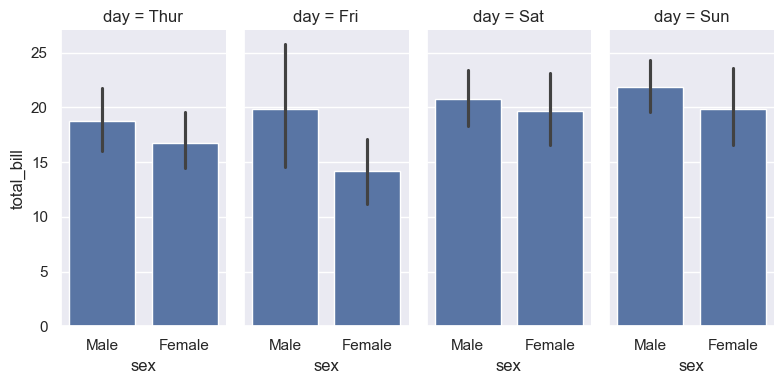

In [104]:
# height,aspect 값을 이용해 figure 크기를 변경
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"]);

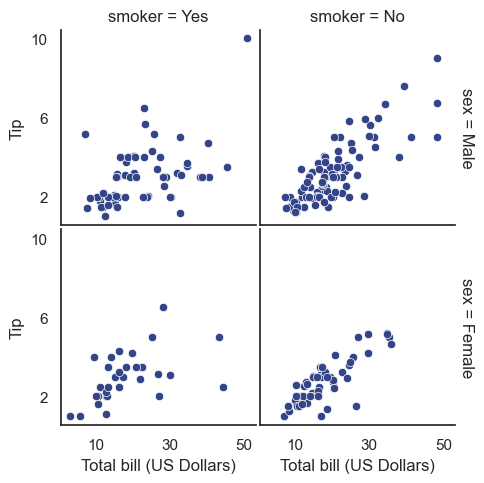

In [105]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "total_bill", "tip", color="#334488")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.figure.subplots_adjust(wspace=.02, hspace=.02)